In [186]:
%load_ext autoreload
%autoreload

import matplotlib

import sys
sys.path.append('../')

#import libs.import_iris
import iris
import iris.coords
import iris.coord_categorisation as cat
from   libs.load_stash import *
import numpy as np

import matplotlib.pyplot as plt
from   libs.plot_TS   import *
from   libs.extract_cube_last_nYears import *
from   pylab import *

import cartopy.crs as ccrs

import warnings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [281]:
jobs = ['u-az513', 'u-az515', 'u-az524']
titles = ['UKESM', 'Global Albedo']
dir   = ['data/' + j + '/' for j in jobs] 
alb_stash = ['m01s01i210', 'm01s01i211']
SWU_stash = 'm01s01i208'

In [309]:
mod = [loadJobs(dir, stash) for stash in alb_stash]

for i in mod:
    for j in i:
        cat.add_year(j, 'time', name = 'year')
        cat.add_season_number(j, 'time')
        j.coord('longitude').guess_bounds()
        j.coord('latitude').guess_bounds()

data/u-az513/
['data/u-az513/az513a.pm1998sep.pp', 'data/u-az513/az513a.pm1998may.pp', 'data/u-az513/az513a.pm1998mar.pp', 'data/u-az513/az513a.pm1998dec.pp', 'data/u-az513/az513a.pm1998feb.pp', 'data/u-az513/az513a.pm1998nov.pp', 'data/u-az513/az513a.pm1998oct.pp', 'data/u-az513/az513a.pm1998jan.pp', 'data/u-az513/az513a.pm1998jul.pp', 'data/u-az513/az513a.pm1998aug.pp', 'data/u-az513/az513a.pm1998jun.pp', 'data/u-az513/az513a.pm1998apr.pp']
None
m01s01i210
data/u-az515/
['data/u-az515/az515a.pm1998aug.pp', 'data/u-az515/az515a.pm1998dec.pp', 'data/u-az515/az515a.pm1998jan.pp', 'data/u-az515/az515a.pm1998jul.pp', 'data/u-az515/az515a.pm1998feb.pp', 'data/u-az515/az515a.pm1998jun.pp', 'data/u-az515/az515a.pm1998may.pp', 'data/u-az515/az515a.pm1998nov.pp', 'data/u-az515/az515a.pm1998mar.pp', 'data/u-az515/az515a.pm1998oct.pp', 'data/u-az515/az515a.pm1998sep.pp', 'data/u-az515/az515a.pm1998apr.pp']
None
m01s01i210
data/u-az524/
['data/u-az524/az524a.pm1998nov.pp', 'data/u-az524/az524a.pm

In [359]:
obs_file = 'outputs/global_albedo/DHR_VIS-regridded.nc'


In [360]:
obs_in = iris.load_cube(obs_file)

In [361]:
obs = mod[0][0].copy()

obs.data = obs_in.data[0:obsi.shape[0], ::-1, :]
#wow.regrid(albi, iris.analysis.Linear())

## Albedo

In [362]:
cmap  = 'YlOrBr_r'
dcmap = 'Spectral'

levels = [0, 0.02, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
dlevels =[-0.2, -0.1, -0.05, -0.02, 0.02, 0.05, 0.1, 0.2]

#map_n_years = 5
#plot_years  = [1985, 1990, 1995, 2000, 2005, 2010, 2015]
#plot_years  = [2005, 2010, 2015]
map_n_years = 1
plot_years  = [1998]

In [363]:
mod_alb = [mod[1][i] / mod[0][i] for i in range(len(mod[0]))]



In [364]:
mod_alb_mean = mod_alb[0].copy()
for i in range(1, len(mod_alb)):
    mod_alb_mean.data += mod_alb[i].data
mod_alb_mean /= len(mod_alb)

In [365]:
mod_alb_max = mod_alb[0].copy()
mod_alb_min = mod_alb[0].copy()
for i in range(1, len(mod_alb)):
    test = mod_alb[i].data > mod_alb_max.data
    mod_alb_max.data[test] = mod_alb[i].data[test]
    test = !test
    mod_alb_min.data[test] = mod_alb[i].data[test]
mod_alb_range = mod_alb_max[0] - mod_alb_min[0]

In [366]:
def make_maps_etc(cube):
    annual_average = cube.collapsed('time'         , iris.analysis.MEAN)
    season_average = cube.aggregated_by('season_number', iris.analysis.MEAN)
    season_average = cube.aggregated_by('season_number', iris.analysis.MEAN)
    
    cube.data = ma.masked_invalid(cube.data)
    weights = iris.analysis.cartography.area_weights(cube)
    ts = cube.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights = weights)
    
    return annual_average, season_average, ts
    

In [367]:
mod_annual_average, mod_season_average, mod_ts = make_maps_etc(mod_alb[0])
obs_annual_average, obs_season_average, obs_ts = make_maps_etc(obs)

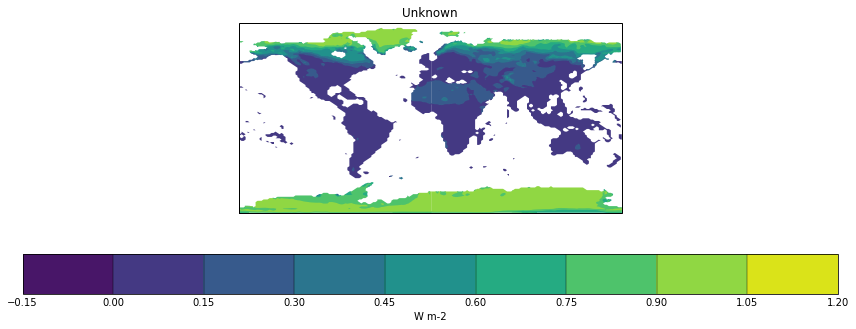

In [368]:
qplt.contourf(obs[0])

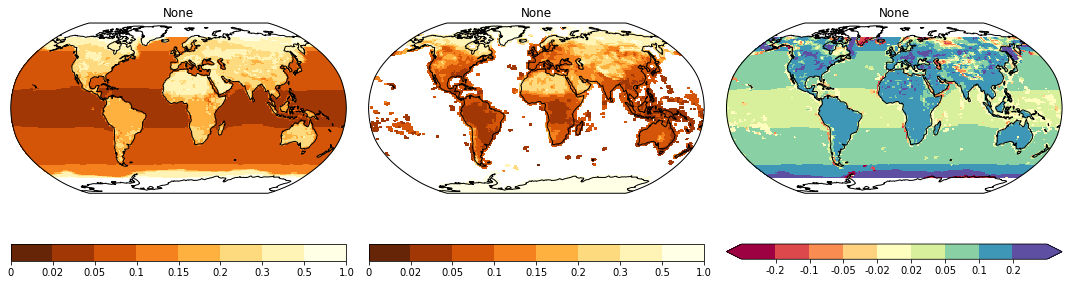

In [369]:
warnings.filterwarnings('ignore')


plot_lonely_cube(mod_annual_average,  1, 3, 1, levels = levels, cmap = cmap, colourbar = True)
plot_lonely_cube(obs_annual_average,  1, 3, 2, levels = levels, cmap = cmap, colourbar = True)
diff = mod_annual_average.copy()
diff.data -= obs_annual_average.data
plot_lonely_cube(diff,  1, 3, 3, levels = dlevels, cmap = dcmap, extend = 'both', colourbar = True)

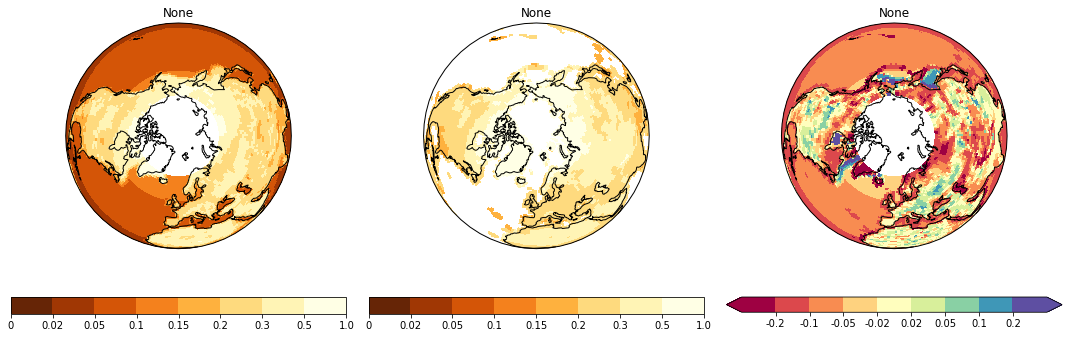

In [371]:
warnings.filterwarnings('ignore')


plot_lonely_cube(mod_annual_average,  1, 3, 1, levels = levels, cmap = cmap, projection=ccrs.Orthographic(0.0, 90.0), colourbar = True)
plot_lonely_cube(obs_annual_average + 0.15,  1, 3, 2, levels = levels, cmap = cmap, projection=ccrs.Orthographic(0.0, 90.0), colourbar = True)
diff = mod_annual_average.copy() - 0.15
diff.data -= obs_annual_average.data
plot_lonely_cube(diff,  1, 3, 3, levels = dlevels, cmap = dcmap, projection=ccrs.Orthographic(0.0, 90.0), extend = 'both', colourbar = True)

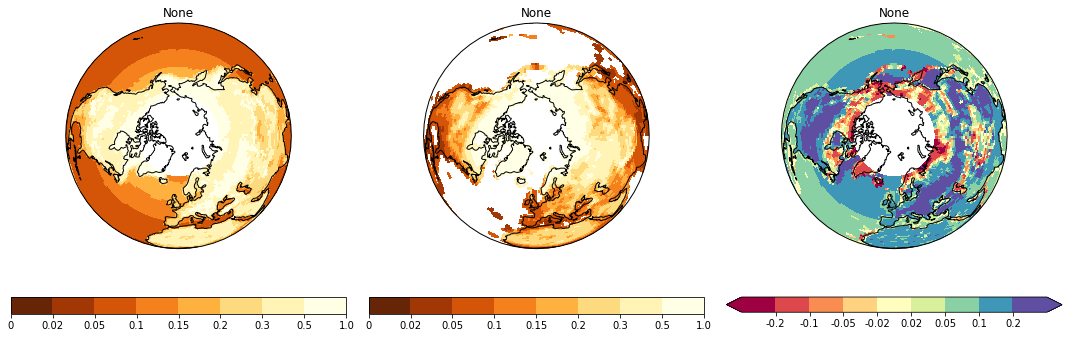

In [372]:
warnings.filterwarnings('ignore')


plot_lonely_cube(mod_season_average[0],  1, 3, 1, levels = levels, cmap = cmap, projection=ccrs.Orthographic(0.0, 90.0), colourbar = True)
plot_lonely_cube(obs_season_average[0],  1, 3, 2, levels = levels, cmap = cmap, projection=ccrs.Orthographic(0.0, 90.0), colourbar = True)
diff = mod_season_average.copy()
diff.data -= obs_season_average.data
plot_lonely_cube(diff[0],  1, 3, 3, levels = dlevels, cmap = dcmap, projection=ccrs.Orthographic(0.0, 90.0), extend = 'both', colourbar = True)

### Global

In [136]:
def map_years_local(cubes, *args, **kw):
    map_years(plot_years, cubes, jobs, levels, dlevels, cmap, dcmap, *args, **kw)
    
albedo[0].name = 'yay'

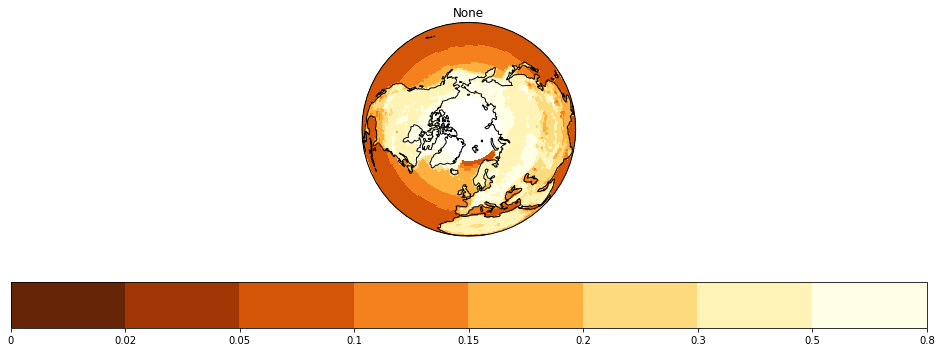

In [143]:
warnings.filterwarnings('ignore')
plot_lonely_cube(albedo[0][0],  levels = levels, cmap = cmap, projection=ccrs.Orthographic(0.0, 90.0))

### Northern Hemisphere

In [ ]:
map_years_local(albedo, projection=ccrs.Orthographic(0.0, 90.0))

In [ ]:

for i, n in zip(albedo, titles): i.long_name = n
    
albedoN = coordRangeExtractCubes(albedo, lat = [0, 90])
plot_cube_TS(albedoN, running_mean = True, units = '')


### Southern Hemisphere

In [ ]:
map_years_local(albedo, projection=ccrs.Orthographic(0.0, -90.0))

## SW

In [ ]:
cmap  = 'brewer_YlOrBr_09'
dcmap = 'brewer_RdBu_11'

levels = [0, 10, 20, 40, 60, 100, 150, 200, 250]
dlevels =[-10, -5, -1, -0.5, -0.1, 0.1, 0.5, 1, 5, 10]

In [ ]:
SW = [alb[0][i] - alb[1][i] for i in range(len(alb[0]))]

In [ ]:
map_years_local(SW, yscale = 0.6)

In [ ]:
map_years_local(SW, projection=ccrs.Orthographic(0.0, 90.0))

In [ ]:
for i, n in zip(SW, titles): i.long_name = n
    
SWN = coordRangeExtractCubes(SW, lat = [0, 90])
plot_cube_TS(SWN, running_mean = True, units = '')

In [ ]:
SWS = coordRangeExtractCubes(SW, lat = [-90, 0])
plot_cube_TS(SWS, running_mean = True, units = '')

In [ ]:
for N, S in zip(SWN, SWS): N.data =- S.data
plot_cube_TS(SWN, running_mean = True, units = '')